In [2]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [3]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)

/home/dosa/MON_ENV_PYTHON/ARTICLE_IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [12]:
#var_bio = ['ppb','netppb','ncp','resp','export_poc200','export_doc200','export_nit_sw','export_nit_iw','chlsurf'] # new vers
var_bio = ['export_nit_sw'] # new vers

#var_phy = ['eke', 'mld', 'ssr', 'sss', 'sst', 'str2']
var_phy = ['eke', 'mld', 'ssr', 'sss', 'sst', 'str2', 'mld_', 'strf']

#correl_1 = '../IAV/LAST_OUTPUT_80_2012/CORREL_1_PCA_2011.nc' 
correl_1 = './LAST_OUTPUT_JAN2019/CORREL_1_PCA_2011.nc' # 31/01/2019

print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    for biovar in var_bio:
        if (biovar == 'resp') | (biovar == 'ncp') : # new version
            vars()[biovar+'_'+phyvar] = f.variables[biovar+phyvar][0,:,:]# extracting data
        else:
            vars()[biovar+'_'+phyvar] = f.variables[biovar+'_'+phyvar][0,:,:]# extracting data
f.close()

#np.shape(netppb_mld) # (160, 394) seems ok!
        
print 'END of CELL'

file exist: True
END of CELL


In [3]:
#var_bio = ['bactc', 'zoo', 'phyto', 'poc', 'doc', 'nitrate', 'phosphate', 'silice', 'chl'] # new vers
var_bio = ['nitrate', 'phosphate'] # new vers

#var_phy = ['eke', 'mld', 'ssr', 'sss', 'sst', 'str2']
var_phy = ['eke', 'mld', 'ssr', 'sss', 'sst', 'str2', 'mld_', 'strf']

#correl_1 = '../IAV/LAST_OUTPUT_80_2012/CORREL_2_PCA_2011.nc'
correl_1 = './LAST_OUTPUT_JAN2019/CORREL_2_PCA_2011.nc' # 31/01/2019 
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    for biovar in var_bio:
        if (biovar == 'resp') | (biovar == 'ncp') : # new version
            vars()[biovar+'_'+phyvar] = f.variables[biovar+phyvar][0,:,:]# extracting data
        else:
            vars()[biovar+'_'+phyvar] = f.variables[biovar+'_'+phyvar][0,:,:]# extracting data

f.close()

#np.shape(bactc_mld) # (160, 394) seems ok!

print 'END of CELL'

file exist: True
END of CELL


In [4]:
# test #
test = bathy
test[test<=200] = 0
test[test>200] = np.nan
test[lon_t<-5.5] = np.nan
test[(lat_t>40) & (lon_t>26.9)] = np.nan

In [6]:
np.shape(bactc_eke)

(160, 394)

In [13]:
# 03/02 NOUVEAU TEST
# TEST SOMME (CORRELATIONS*10) CARRE

#var_bio_test = ['ppb','netppb','ncp','resp','export_poc200','export_doc200','export_nit_sw','export_nit_iw','chlsurf','bactc', 'zoo'] # new vers
#var_bio_test = ['ppb','netppb','ncp','resp','export_poc200','export_doc200','export_nit_sw','export_nit_iw','chlsurf','bactc', 
#                'zoo', 'phyto', 'poc', 'doc', 'nitrate', 'phosphate', 'silice', 'chl']
#var_bio_test = ['nitrate', 'phosphate']
var_bio_test = ['export_nit_sw']

# On remet ici dans l'ordre des figures qu'on souhaite :
#var_phy_test = ['ssr', 'sst', 'mld', 'sss', 'eke', 'str2'] 
var_phy_test = ['ssr', 'sst', 'eke', 'sss', 'mld', 'str2', 'mld_', 'strf'] # Test Alex 31/01 

c = 1 

for phyvar in var_phy_test:
    vars()['tot_arr_'+phyvar] = np.zeros([160,394])
    #vars()['tot_arr_'+phyvar][:] = np.nan
    
for phyvar in var_phy_test:
    for biovar in var_bio_test:

        #print "adding: "+biovar+'_'+phyvar
        data_to_plot = np.ma.masked_where(bathy<200,vars()[biovar+'_'+phyvar])
        data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

        vars()['tot_arr_'+phyvar] = vars()['tot_arr_'+phyvar]+np.square(data_to_plot*10)
        
        #data_to_plot = []
    print 'tot_arr_'+phyvar


print 'END of CELL'

tot_arr_ssr
tot_arr_sst
tot_arr_eke
tot_arr_sss
tot_arr_mld
tot_arr_str2
tot_arr_mld_
tot_arr_strf
END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in less


In [14]:
# TEST SOMME CORRELATIONS CARRE

#var_bio_test = ['ppb','netppb','ncp','resp','export_poc200','export_doc200','export_nit_sw','export_nit_iw','chlsurf','bactc', 'zoo'] # new vers
#var_bio_test = ['ppb','netppb','ncp','resp','export_poc200','export_doc200','export_nit_sw','export_nit_iw','chlsurf','bactc', 
#                'zoo', 'phyto', 'poc', 'doc', 'nitrate', 'phosphate', 'silice', 'chl']
var_bio_test = ['export_nit_sw']

# On remet ici dans l'ordre des figures qu'on souhaite :
#var_phy_test = ['ssr', 'sst', 'mld', 'sss', 'eke', 'str2'] 
var_phy_test = ['ssr', 'sst', 'eke', 'sss', 'mld', 'str2', 'mld_', 'strf'] # Test Alex 31/01 

c = 1 

for phyvar in var_phy_test:
    vars()['tot_arr_'+phyvar] = np.zeros([160,394])
    #vars()['tot_arr_'+phyvar][:] = np.nan
    
for phyvar in var_phy_test:
    for biovar in var_bio_test:

        #print "adding: "+biovar+'_'+phyvar
        data_to_plot = np.ma.masked_where(bathy<200,vars()[biovar+'_'+phyvar])
        data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

        vars()['tot_arr_'+phyvar] = vars()['tot_arr_'+phyvar]+np.square(data_to_plot)
        
        #data_to_plot = []
    print 'tot_arr_'+phyvar


print 'END of CELL'

tot_arr_ssr
tot_arr_sst
tot_arr_eke
tot_arr_sss
tot_arr_mld
tot_arr_str2
tot_arr_mld_
tot_arr_strf
END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in less


In [7]:
np.shape(data_to_plot)
np.shape(tot_arr_eke)

(160, 394)

In [18]:
tot_arr_mld

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = -9999.0)

In [19]:
ppb_mld

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = -9999.0)

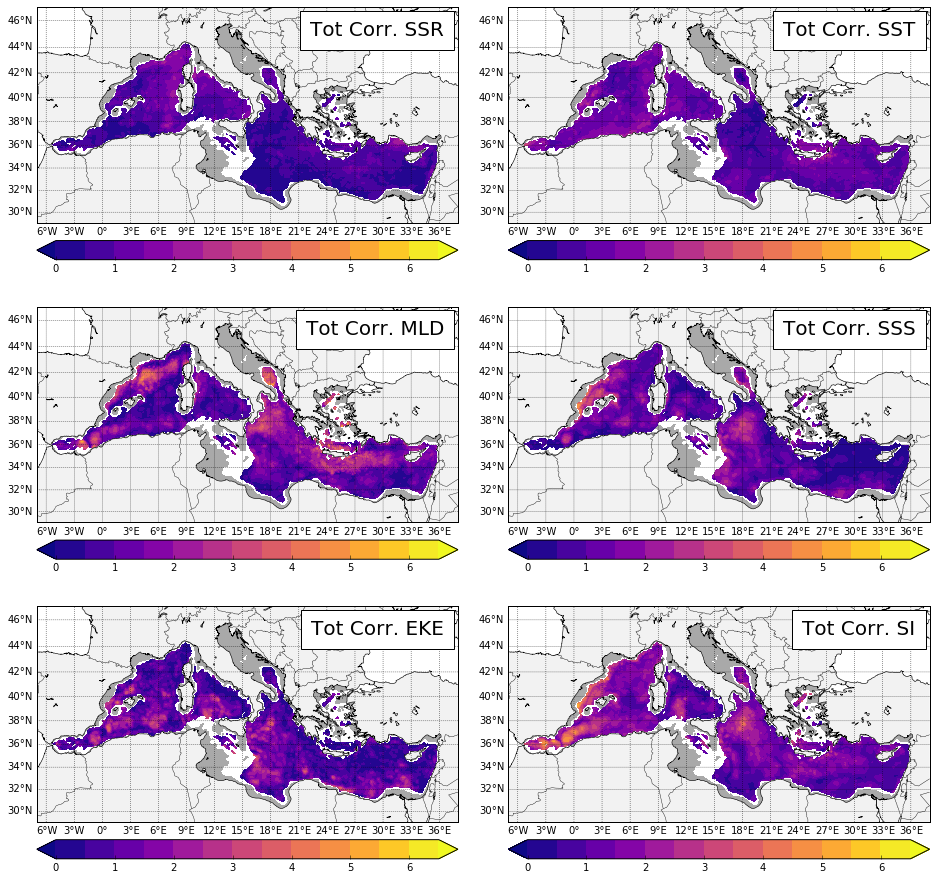

In [16]:
# figure
plt.figure(figsize=(16,16));
#fig = plt.figure(figsize=(16,16));

c = 1
data_to_plot = []

for phyvar in var_phy_test:
    
    # subplot
    plt.subplot(3, 2, c)
        
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,2);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,3); # 1.5
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = vars()['tot_arr_'+phyvar]
    #data_to_plot = vars()[biovar+'_'+phyvar]
    #data_to_plot = np.ma.masked_where(bathy<200,vars()['tot_arr_'+phyvar])
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,7,0.5);
    #levels2 = np.arange(0,10,0.2); # More precise critical value for df=31 (N=33)
    levels_bathy = [200] ;
    m.contourf(xd,yd,test,cmap=plt.cm.Greys);
    CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.plasma, extend='both');# binary / jet ,levels=levels
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
    #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.colorbar(cs, orientation='horizontal', pad = 0.06)
    x_text,y_text = m(36.5,46)
    if phyvar == 'str2':
        phyvar_t = 'si'
    else:
            phyvar_t = phyvar

    this_txt = str(phyvar_t)
    upp_txt = this_txt.upper()
    upp_txt2 = 'Tot Corr. '+upp_txt
    # fontweight='bold',
    plt.text(x_text,y_text, upp_txt2,fontsize=20,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5, 
    plt.subplots_adjust(hspace=0.02, wspace=0.12) 
    # Example # top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.02, wspace=0.2
    c += 1

#plt.savefig('/home/dosa/THESE/CR_reunions/DEC_2018_FIGS/COMPAR/GPP_fig.png',bbox_inches='tight',format='png')
#plt.savefig('/home/dosa/THESE/CR_reunions/JAN2019_FIGS/TEST_CORR_fig.png',bbox_inches='tight',format='png')

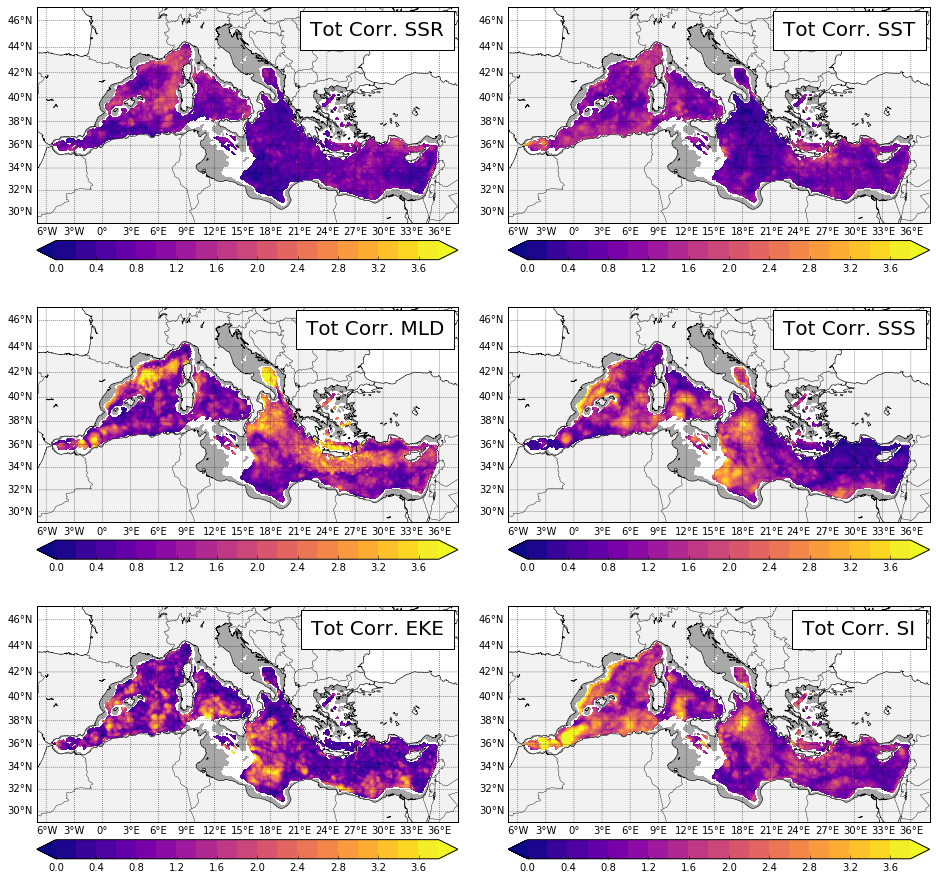

In [22]:
# figure
plt.figure(figsize=(16,16));
#fig = plt.figure(figsize=(16,16));

c = 1
data_to_plot = []

for phyvar in var_phy_test:
    
    # subplot
    plt.subplot(3, 2, c)
        
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,2);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,3); # 1.5
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = vars()['tot_arr_'+phyvar]
    #data_to_plot = vars()[biovar+'_'+phyvar]
    #data_to_plot = np.ma.masked_where(bathy<200,vars()['tot_arr_'+phyvar])
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,4,0.2);
    #levels2 = np.arange(0,10,0.2); # More precise critical value for df=31 (N=33)
    levels_bathy = [200] ;
    m.contourf(xd,yd,test,cmap=plt.cm.Greys);
    CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.plasma, extend='both');# binary / jet ,levels=levels
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
    #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.colorbar(cs, orientation='horizontal', pad = 0.06)
    x_text,y_text = m(36.5,46)
    if phyvar == 'str2':
        phyvar_t = 'si'
    else:
            phyvar_t = phyvar

    this_txt = str(phyvar_t)
    upp_txt = this_txt.upper()
    upp_txt2 = 'Tot Corr. '+upp_txt
    # fontweight='bold',
    plt.text(x_text,y_text, upp_txt2,fontsize=20,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5, 
    plt.subplots_adjust(hspace=0.02, wspace=0.12) 
    # Example # top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.02, wspace=0.2
    c += 1

#plt.savefig('/home/dosa/THESE/CR_reunions/DEC_2018_FIGS/COMPAR/GPP_fig.png',bbox_inches='tight',format='png')
plt.savefig('/home/dosa/THESE/CR_reunions/JAN2019_FIGS/TEST_CORR_fig_old.png',bbox_inches='tight',format='png')

ValueError: num must be 1 <= num <= 6, not 7

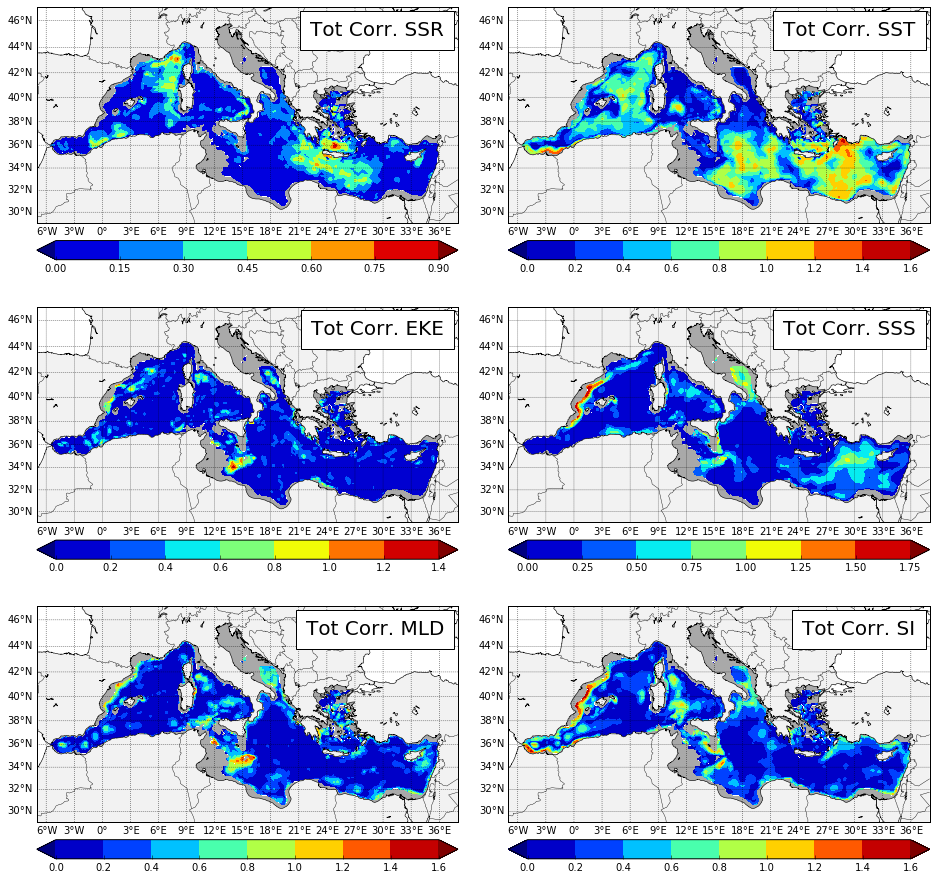

In [10]:
# figure
plt.figure(figsize=(16,16));
#fig = plt.figure(figsize=(16,16));

c = 1
data_to_plot = []

for phyvar in var_phy_test:
    
    # subplot
    plt.subplot(3, 2, c)
        
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,2);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,3); # 1.5
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = vars()['tot_arr_'+phyvar]
    #data_to_plot = vars()[biovar+'_'+phyvar]
    #data_to_plot = np.ma.masked_where(bathy<200,vars()['tot_arr_'+phyvar])
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,4,0.2);
    #levels2 = np.arange(0,10,0.2); # More precise critical value for df=31 (N=33)
    levels_bathy = [200] ;
    m.contourf(xd,yd,test,cmap=plt.cm.Greys);
    CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet, extend='both');# binary / jet ,levels=levels
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
    #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.colorbar(cs, orientation='horizontal', pad = 0.06)
    x_text,y_text = m(36.5,46)
    if phyvar == 'str2':
        phyvar_t = 'si'
    else:
            phyvar_t = phyvar

    this_txt = str(phyvar_t)
    upp_txt = this_txt.upper()
    upp_txt2 = 'Tot Corr. '+upp_txt
    # fontweight='bold',
    plt.text(x_text,y_text, upp_txt2,fontsize=20,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5, 
    plt.subplots_adjust(hspace=0.02, wspace=0.12) 
    # Example # top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.02, wspace=0.2
    c += 1

#plt.savefig('/home/dosa/THESE/CR_reunions/DEC_2018_FIGS/COMPAR/GPP_fig.png',bbox_inches='tight',format='png')
plt.savefig('/home/dosa/THESE/CR_reunions/JAN2019_FIGS/TEST_CORR_fig2_old.png',bbox_inches='tight',format='png')

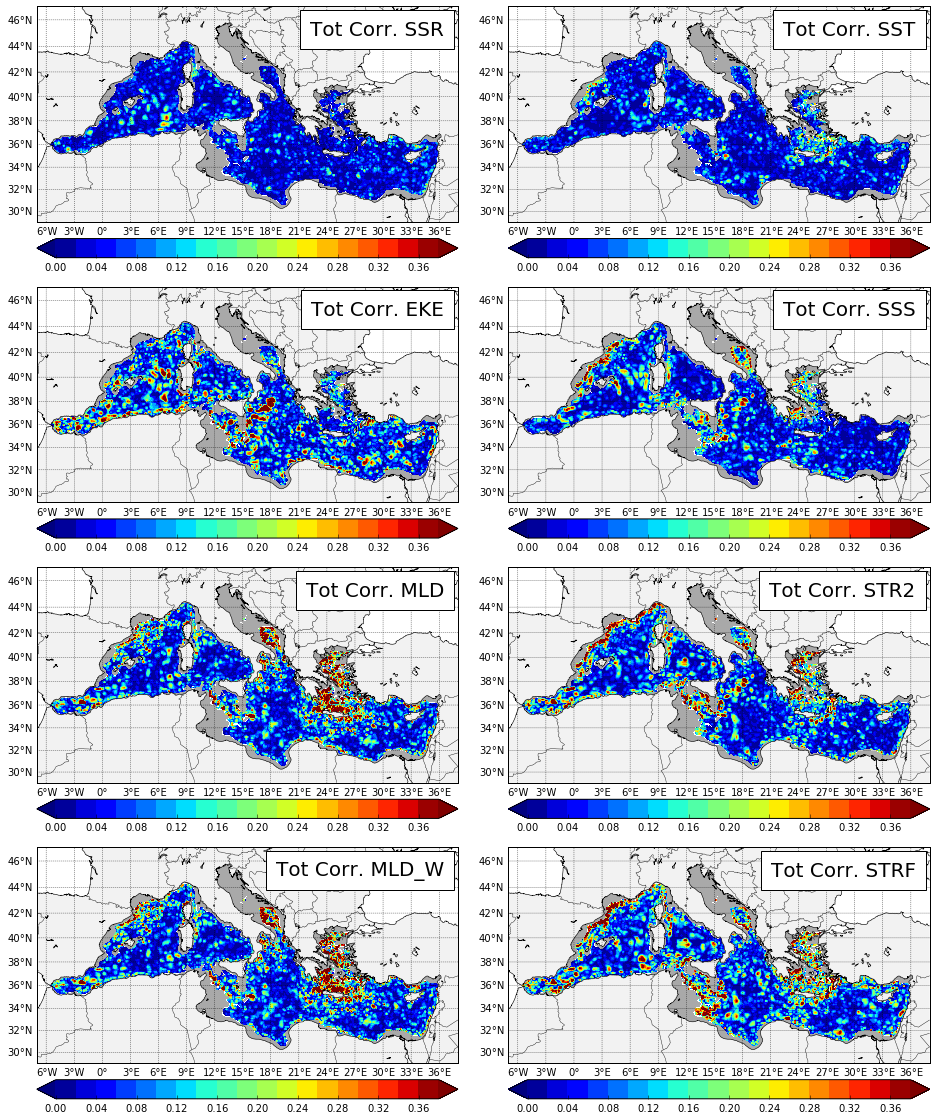

In [16]:
# 31/01 TEST 8 FORCINGS

# figure
plt.figure(figsize=(16,20));
#fig = plt.figure(figsize=(16,16));

c = 1
data_to_plot = []

for phyvar in var_phy_test:
    
    # subplot
    plt.subplot(4, 2, c)
        
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,2);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,3); # 1.5
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = vars()['tot_arr_'+phyvar]
    #data_to_plot = vars()[biovar+'_'+phyvar]
    #data_to_plot = np.ma.masked_where(bathy<200,vars()['tot_arr_'+phyvar])
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,0.4,0.02);
    #levels2 = np.arange(0,10,0.2); # More precise critical value for df=31 (N=33)
    levels_bathy = [200] ;
    m.contourf(xd,yd,test,cmap=plt.cm.Greys);
    CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='grey');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet, extend='both');# binary / jet ,levels=levels
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
    #plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.colorbar(cs, orientation='horizontal', pad = 0.06)
    x_text,y_text = m(36.5,46)
    if phyvar == 'mld_':
        phyvar_t = 'mld_w'
    else:
            phyvar_t = phyvar

    this_txt = str(phyvar_t)
    upp_txt = this_txt.upper()
    upp_txt2 = 'Tot Corr. '+upp_txt
    # fontweight='bold',
    plt.text(x_text,y_text, upp_txt2,fontsize=20,  bbox={'facecolor':'white', 'pad':10},ha='right', va ='top') # 'facecolor':'red', 'alpha':0.5, 
    plt.subplots_adjust(hspace=0.02, wspace=0.12) 
    # Example # top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.02, wspace=0.2
    c += 1

#plt.savefig('/home/dosa/THESE/CR_reunions/DEC_2018_FIGS/COMPAR/GPP_fig.png',bbox_inches='tight',format='png')
#plt.savefig('/home/dosa/THESE/CR_reunions/JAN2019_FIGS/TEST_CORR_fig_8_FORCINGS_v3.png',bbox_inches='tight',format='png')
#plt.savefig('/home/dosa/THESE/CR_reunions/JAN2019_FIGS/Nit_Phosph_CORR_fig.png',bbox_inches='tight',format='png')
plt.savefig('/home/dosa/THESE/CR_reunions/JAN2019_FIGS/NUTS/ExpNitsw_CORR.png',bbox_inches='tight',format='png')

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in less


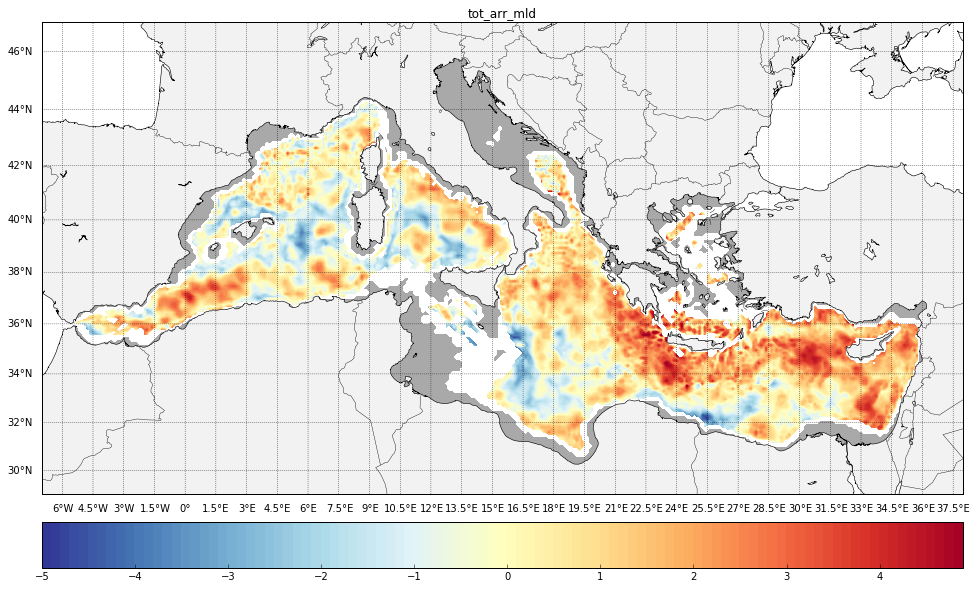

In [33]:
# Removing non significant values
#for phyvar in var_phy:
#    for biovar in var_bio:
#        vars()[biovar+'_'+phyvar][(vars()[biovar+'_'+phyvar]>-0.33)&(vars()[biovar+'_'+phyvar]<0.33)] = np.nan

#np.shape(test)

var_phy = ['mld'] # 'snsf','strf',

for phyvar in var_phy:
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                # figure
    fig = plt.figure(figsize=(16,16));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,2);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()['tot_arr_'+phyvar])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(-5,5,0.1);
    levels2 = [-0.33,0.33];
    levels_bathy = [200] ;
    m.contourf(xd,yd,test,cmap=plt.cm.Greys);
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title('tot_arr_'+phyvar)

print 'END of CELL'

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in less


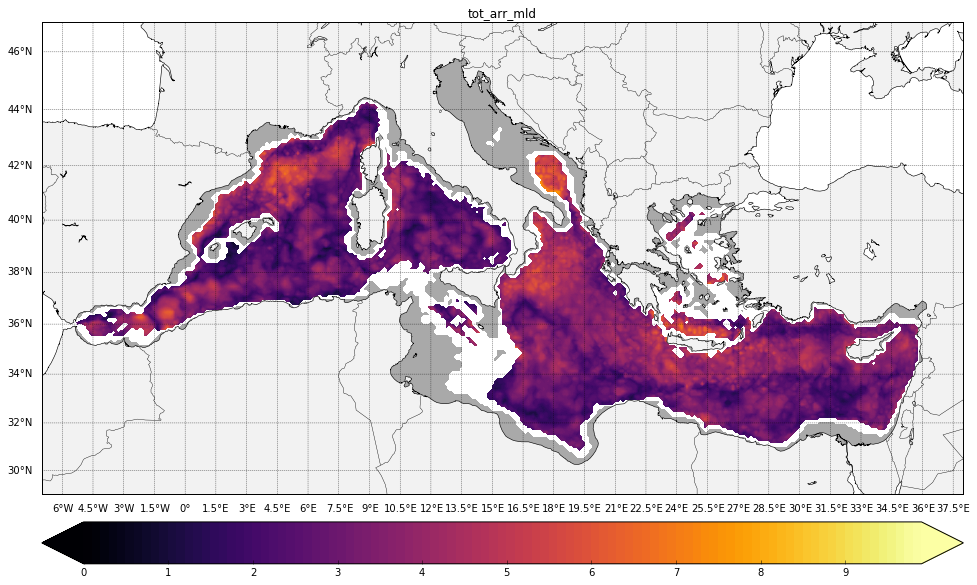

In [41]:
# Removing non significant values
#for phyvar in var_phy:
#    for biovar in var_bio:
#        vars()[biovar+'_'+phyvar][(vars()[biovar+'_'+phyvar]>-0.33)&(vars()[biovar+'_'+phyvar]<0.33)] = np.nan

#np.shape(test)

var_phy = ['mld'] # 'snsf','strf',

for phyvar in var_phy:
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                # figure
    fig = plt.figure(figsize=(16,16));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,2);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()['tot_arr_'+phyvar])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,10,0.1);
    levels2 = [-0.33,0.33];
    levels_bathy = [200] ;
    m.contourf(xd,yd,test,cmap=plt.cm.Greys);
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.inferno, extend ='both');# binary / jet ,levels=levels
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title('tot_arr_'+phyvar)

print 'END of CELL'